In [1]:
from experiment import Experiment
from utils.behavior_data import BehaviorData
from utils.content import StatesHandler
from visuals import Plotter
import torch
import numpy as np
from utils.state_data import StateData
import matplotlib.pyplot as plt

In [2]:
def load_questionnaire_states(endline=False, detail=0, aiset=True):
        if (detail > 1):
            sh = StatesHandler(map="map_individual.json", endline=endline)
        elif (detail > 0):
            sh = StatesHandler(map="map_detailed.json", endline=endline)
        else:
            sh = StatesHandler(map="map.json", endline=endline)
        whatsapps, states = sh.compute_states()
        def modify_whatsapp(x):
            # helper function to parse the whatsapp numbers
            x = str(x)
            x = x[len(x)-10:]
            return int(x)
        participantIDs = torch.tensor(np.loadtxt("arogya_content/all_ai_participants.csv", delimiter=",", skiprows=1, dtype="int64"))
        participantIDs[:, 1].apply_(modify_whatsapp)
        
        # filter responses to only include ones in the AI participant set
        isect, idIdxs, stateIdxs = np.intersect1d(participantIDs[:, 1], whatsapps, return_indices=True)
        if (aiset):
            # combine the glific IDs with the states into a dictionary and return
            return dict(zip(participantIDs[idIdxs, 0].numpy(), states[stateIdxs].numpy()))
        else:
            if (True):
                stats = np.delete(states.numpy(), stateIdxs, axis=0)
                wapps = np.delete(whatsapps.numpy(), stateIdxs)
            else:
                stats = states.numpy()
                wapps = whatsapps.numpy()
            return dict(zip(wapps, stats))
        
post = load_questionnaire_states(True, 0, True)
print(len(post))
pre = load_questionnaire_states(False, 0, True)
print(len(pre))


diffs = {}

for glifid in post.keys():
    if glifid in pre:
        diffs[glifid] = post[glifid] - pre[glifid]
    else:
        print(glifid)
    
print(len(diffs))

diffValsAI = np.array(list(diffs.values()))[:, 0:5]

480
806
480


In [3]:
post = load_questionnaire_states(True, 0, False)
print(len(post))
pre = load_questionnaire_states(False, 0, False)
print(len(pre))


diffs = {}

for glifid in post.keys():
    if glifid in pre:
        diffs[glifid] = post[glifid] - pre[glifid]
    else:
        None
        
diffValsNAI = np.array(list(diffs.values()))[:, 0:5]
print(len(diffs))

568
807
441


Healthy Food Intake, Unhealthy Food/Tobacco/Alcohol Intake, Fitness/Activiy Level, Cause Knowledge, Complication Knowledge
AI Mean Diffs:  [-0.03791668  0.02916667  0.08624995  0.25833333  0.02738095]
non-AI Mean Diffs:  [-0.03038548  0.04761905  0.06802721  0.24414212  0.08098478]


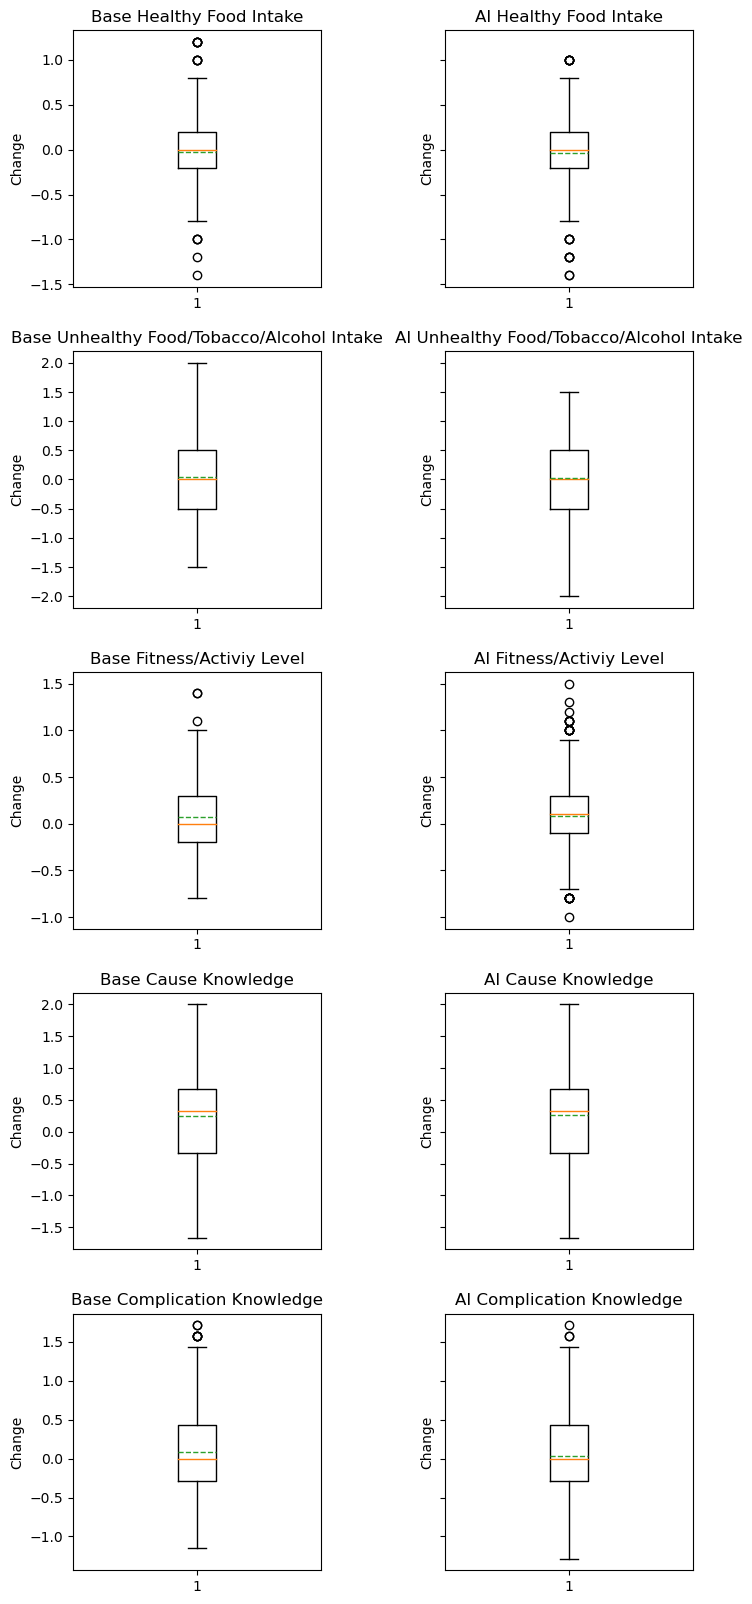

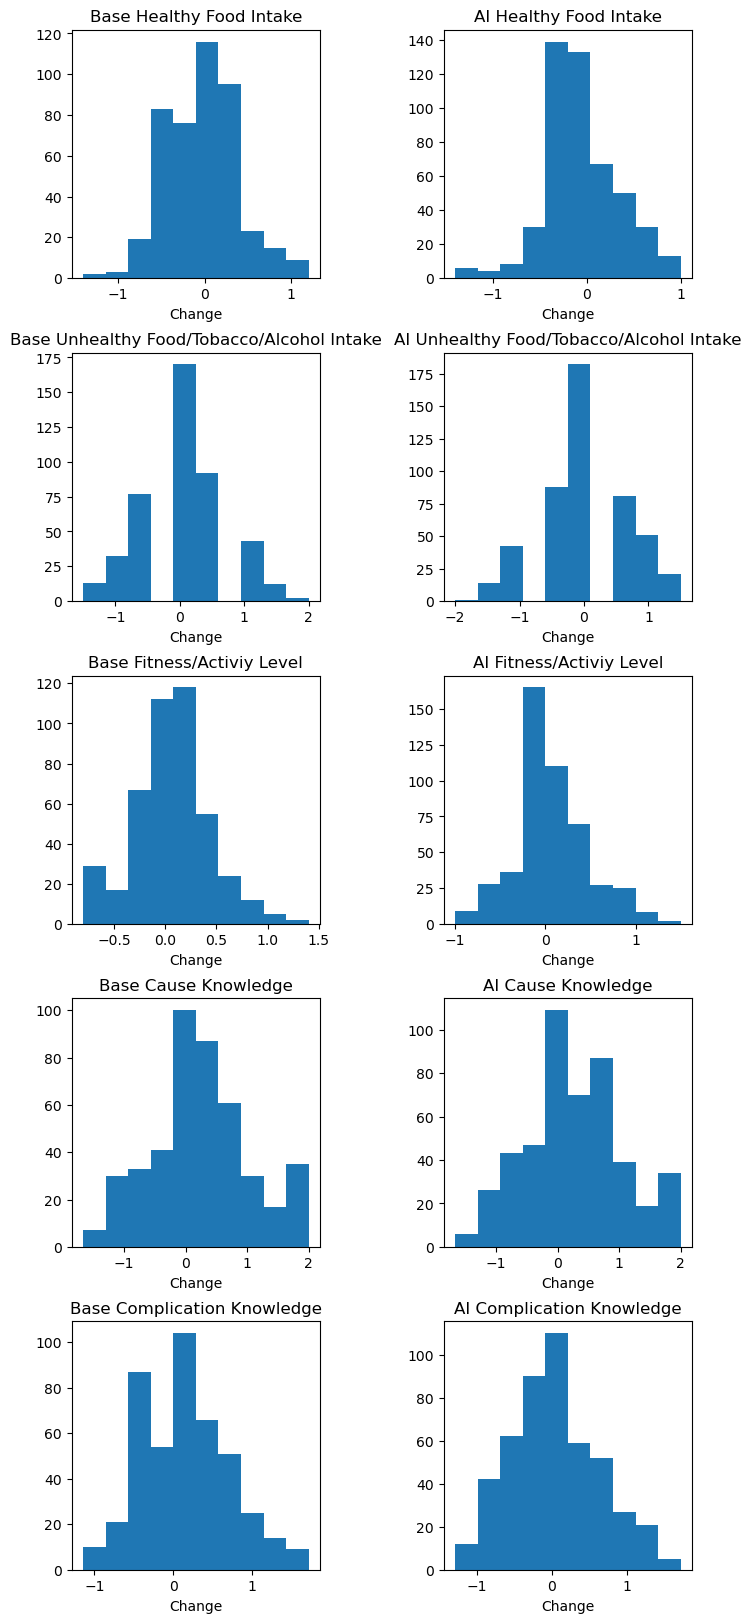

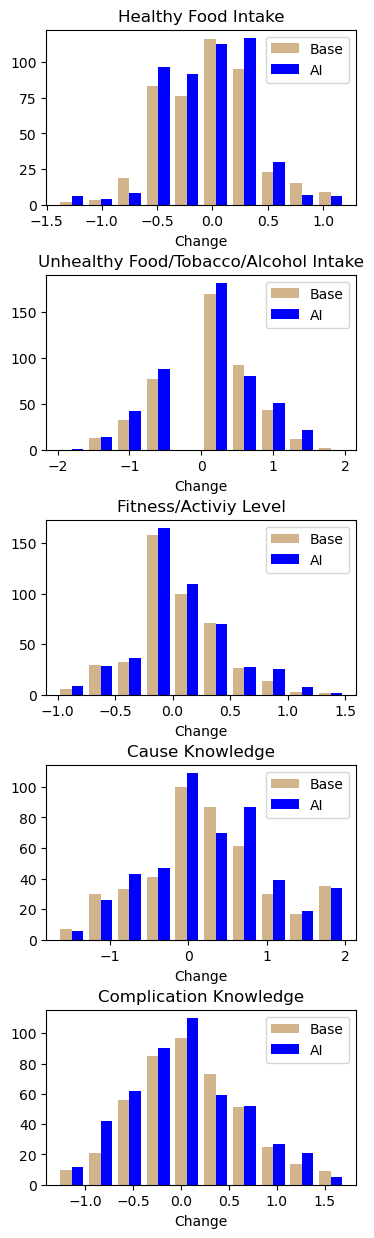

In [5]:
print("Healthy Food Intake",
    "Unhealthy Food/Tobacco/Alcohol Intake",
    "Fitness/Activiy Level",
    "Cause Knowledge",
    "Complication Knowledge", sep=", ")
print("AI Mean Diffs: ", diffValsAI.mean(axis=0))
print("non-AI Mean Diffs: ", diffValsNAI.mean(axis=0))

elem_map = [
    "Base Healthy Food Intake",
    "AI Healthy Food Intake",
    "Base Unhealthy Food/Tobacco/Alcohol Intake",
    "AI Unhealthy Food/Tobacco/Alcohol Intake",
    "Base Fitness/Activiy Level",
    "AI Fitness/Activiy Level",
    "Base Cause Knowledge",
    "AI Cause Knowledge",
    "Base Complication Knowledge",
    "AI Complication Knowledge"
]


fig, ax = plt.subplots(nrows=5, ncols=2, sharey="row", figsize=(8, 20));
for x in range(5):
    ax[x, 0].boxplot(diffValsNAI[:, x], meanline=True, showmeans=True);
    ax[x, 0].set(title=elem_map[2*x], ylabel="Change")
    ax[x, 1].boxplot(diffValsAI[:, x], meanline=True, showmeans=True);
    ax[x, 1].set(title=elem_map[2*x + 1], ylabel="Change")
plt.subplots_adjust(hspace=.25, wspace=.5)

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(8, 20));
for x in range(5):
    ax[x, 0].hist(diffValsNAI[:, x]);
    ax[x, 0].set(title=elem_map[2*x], xlabel="Change")
    ax[x, 1].hist(diffValsAI[:, x]);
    ax[x, 1].set(title=elem_map[2*x + 1], xlabel="Change")
plt.subplots_adjust(hspace=.30, wspace=.5)

elem_map = [
    "Healthy Food Intake",
    "Unhealthy Food/Tobacco/Alcohol Intake",
    "Fitness/Activiy Level",
    "Cause Knowledge",
    "Complication Knowledge"
]

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(4, 15));
for x in range(5):
    ax[x].hist([diffValsNAI[:, x], diffValsAI[:, x]], color=['tan', 'blue'], label=['Base', 'AI'], stacked=False);
    ax[x].set(title=elem_map[x], xlabel="Change")
    ax[x].legend()
plt.subplots_adjust(hspace=.40, wspace=.25)